## Функции Активации

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torch

In [ ]:
import numpy as np

## MLP

## Данные

In [ ]:
import torchvision as tv

In [ ]:
import time

In [ ]:
BATCH_SIZE=256

In [ ]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

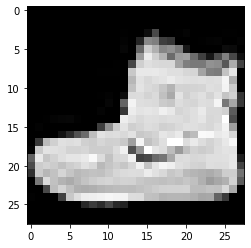

In [ ]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

## Модель

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=.01)
num_epochs = 10

In [ ]:
import time

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 6.935, train_loss: 1.7594682977554645, train_acc: 0.5574666666666667, test_loss: 1.2896548122167588, test_acc: 0.6484
ep: 1, taked: 6.730, train_loss: 1.0713129855216819, train_acc: 0.6761166666666667, test_loss: 0.9408944979310035, test_acc: 0.6824
ep: 2, taked: 6.765, train_loss: 0.8597785587006427, train_acc: 0.7127333333333333, test_loss: 0.8145428836345673, test_acc: 0.7143
ep: 3, taked: 6.744, train_loss: 0.7656333976603569, train_acc: 0.7427666666666667, test_loss: 0.7444203615188598, test_acc: 0.7387
ep: 4, taked: 6.737, train_loss: 0.707268203573024, train_acc: 0.7638166666666667, test_loss: 0.6964949011802674, test_acc: 0.7555
ep: 5, taked: 6.822, train_loss: 0.6652122294649164, train_acc: 0.7786833333333333, test_loss: 0.6607257753610611, test_acc: 0.7708
ep: 6, taked: 6.766, train_loss: 0.6328425848737677, train_acc: 0.7906, test_loss: 0.6329184144735336, test_acc: 0.7807
ep: 7, taked: 6.690, train_loss: 0.6071059823036193, train_acc: 0.7995833333333333, test_

## Практика - попробуйте заменить SGD на Adam и RMSProp. Увеличиться ли скорость сходимости?

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=.01)
num_epochs = 10

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 7.099, train_loss: 0.5787898641951541, train_acc: 0.8128166666666666, test_loss: 0.45567682534456255, test_acc: 0.8366
ep: 1, taked: 7.112, train_loss: 0.3835122767915117, train_acc: 0.8611666666666666, test_loss: 0.4332816429436207, test_acc: 0.8475
ep: 2, taked: 7.039, train_loss: 0.3495026312609936, train_acc: 0.8727166666666667, test_loss: 0.39754939898848535, test_acc: 0.8594
ep: 3, taked: 7.630, train_loss: 0.32707192422227654, train_acc: 0.8798333333333334, test_loss: 0.40235042460262777, test_acc: 0.8632
ep: 4, taked: 7.577, train_loss: 0.3153773049724863, train_acc: 0.8832333333333333, test_loss: 0.4278166491538286, test_acc: 0.856
ep: 5, taked: 7.585, train_loss: 0.30179811246851657, train_acc: 0.8875666666666666, test_loss: 0.391941200196743, test_acc: 0.8695
ep: 6, taked: 7.588, train_loss: 0.2966271478444972, train_acc: 0.88995, test_loss: 0.3912541687488556, test_acc: 0.8684
ep: 7, taked: 7.586, train_loss: 0.28435790278810136, train_acc: 0.8926, test_loss: 

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.RMSprop(model.parameters(), lr=.01)
num_epochs = 10

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 7.421, train_loss: 1.325469534891717, train_acc: 0.8452833333333334, test_loss: 0.49605782777071, test_acc: 0.8441
ep: 1, taked: 7.275, train_loss: 0.3287469777021002, train_acc: 0.8794666666666666, test_loss: 0.4268001619726419, test_acc: 0.8561
ep: 2, taked: 7.311, train_loss: 0.3216015081456367, train_acc: 0.8796, test_loss: 0.5073047336190939, test_acc: 0.842
ep: 3, taked: 7.303, train_loss: 0.35944131536686674, train_acc: 0.8787166666666667, test_loss: 0.3897757299244404, test_acc: 0.8725
ep: 4, taked: 7.435, train_loss: 0.3023247118960036, train_acc: 0.8865666666666666, test_loss: 0.3942738246172667, test_acc: 0.8719
ep: 5, taked: 7.433, train_loss: 0.33924888213898274, train_acc: 0.8837666666666667, test_loss: 0.4065690692514181, test_acc: 0.8706
ep: 6, taked: 7.454, train_loss: 0.2784608275332349, train_acc: 0.8939833333333334, test_loss: 0.40416058897972107, test_acc: 0.8705
ep: 7, taked: 7.461, train_loss: 0.2902691236835845, train_acc: 0.8919333333333334, test_

## Практика - попробуйте сделать больше слоев в сети  - увеличиться ли качество?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),    
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=.01)
num_epochs = 10

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 10.390, train_loss: 0.5845604805236168, train_acc: 0.7855833333333333, test_loss: 0.4297003407031298, test_acc: 0.8445
ep: 1, taked: 10.079, train_loss: 0.3970557139909014, train_acc: 0.8556166666666667, test_loss: 0.391189082339406, test_acc: 0.8602
ep: 2, taked: 10.506, train_loss: 0.36049622500196415, train_acc: 0.8685, test_loss: 0.41388404928147793, test_acc: 0.8504
ep: 3, taked: 12.511, train_loss: 0.34028702898228425, train_acc: 0.8745666666666667, test_loss: 0.39115438498556615, test_acc: 0.8631
ep: 4, taked: 12.009, train_loss: 0.32829531843357895, train_acc: 0.8782, test_loss: 0.39220924153923986, test_acc: 0.866
ep: 5, taked: 12.054, train_loss: 0.31922670177956847, train_acc: 0.8826666666666667, test_loss: 0.391376768425107, test_acc: 0.8639
ep: 6, taked: 11.947, train_loss: 0.30787016127971895, train_acc: 0.8858333333333334, test_loss: 0.3929715231060982, test_acc: 0.8681
ep: 7, taked: 12.011, train_loss: 0.29615754783153536, train_acc: 0.8893833333333333, te

## Практика - попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.Dropout2d(0.25),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.Dropout2d(0.25),
    torch.nn.ReLU(),    
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=.01)
num_epochs = 10

In [ ]:
def l1_regularizer(model, lambda_l1=0.01):
    lossl1 = 0
    for model_param_name, model_param_value in model.named_parameters():
            if model_param_name.endswith('weight'):
                lossl1 += lambda_l1 * model_param_value.abs().sum()
    return lossl1    

def orth_regularizer(model, lambda_orth=0.01):
    lossorth = 0
    for model_param_name, model_param_value in model.named_parameters():
            if model_param_name.endswith('weight'):
                param_flat = model_param_value.view(model_param_value.shape[0], -1)
                sym = torch.mm(param_flat, torch.t(param_flat))
                sym -= torch.eye(param_flat.shape[0])
                lossorth += lambda_orth * sym.sum()
    return lossorth

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
#l1_regularization, l2_regularization = torch.tensor(0), torch.tensor(0) 
#for param in model.parameters():
#    l1_regularization += torch.norm(param, 1)**2  
#    l2_regularization += torch.norm(param, 2)**2
    lambda_l1 = 0
    lambda_orth = 0
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y) + l1_regularizer(model, lambda_l1=lambda_l1) + orth_regularizer(model, lambda_orth=lambda_orth)   
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y) + l1_regularizer(model, lambda_l1=lambda_l1) + orth_regularizer(model, lambda_orth=lambda_orth)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 18.544, train_loss: 0.5760005438581426, train_acc: 0.7870666666666667, test_loss: 0.45358183421194553, test_acc: 0.8289
ep: 1, taked: 18.421, train_loss: 0.4210903109388148, train_acc: 0.8465333333333334, test_loss: 0.42001531049609186, test_acc: 0.8459
ep: 2, taked: 18.526, train_loss: 0.38941204471791047, train_acc: 0.8571666666666666, test_loss: 0.3906710661947727, test_acc: 0.8577
ep: 3, taked: 19.888, train_loss: 0.3701949876673678, train_acc: 0.8641333333333333, test_loss: 0.3635055758059025, test_acc: 0.8689
ep: 4, taked: 19.829, train_loss: 0.35105845750646386, train_acc: 0.8703333333333333, test_loss: 0.3581876153126359, test_acc: 0.8673
ep: 5, taked: 19.849, train_loss: 0.338005841475852, train_acc: 0.8745333333333334, test_loss: 0.3482749545946717, test_acc: 0.8706
ep: 6, taked: 19.560, train_loss: 0.32909654372550073, train_acc: 0.8783, test_loss: 0.3420228185132146, test_acc: 0.8736
ep: 7, taked: 19.550, train_loss: 0.3184205507344388, train_acc: 0.8814166666